## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [98]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [99]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [100]:
number_rows = df.shape[0]


print(number_rows)

69889


In [101]:
proportion_convert = df['converted'].mean()

print(proportion_convert)

0.13047832992316388


In [102]:
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


In [103]:
group_counts = df['group'].value_counts()

print(group_counts)

group
treatment    35211
control      34678
Name: count, dtype: int64


`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [104]:
missing_values = df.isna().sum()
print(missing_values)

country      0
group        0
converted    0
dtype: int64


In [105]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts


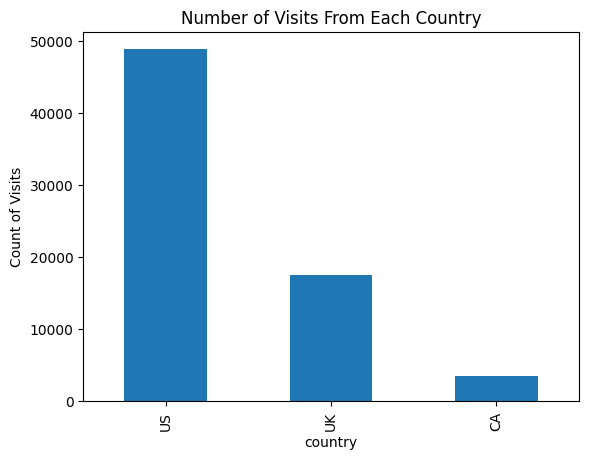

In [106]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [107]:
#The column that is not categorical is convert because is a integer number
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [108]:
#The possible values of 'converted column are 1 and 0 depending on the user if they buy or not'


unique_values = df['converted'].unique()

print(unique_values)

[0 1]


<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [109]:
df['converted'].mean()
#the probability of chance conversion is 13.05%



0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [110]:
contro = df.query('group == "control"')['converted'].mean()
print(contro)

0.1052540515600669


`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [111]:
treat = df.query('group == "treatment"')['converted'].mean()

print(treat)

0.15532078043793132


`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [112]:
#absolutely the treatment group have 15.53% of convert rates
#the control group have a 10.52% of converted rates

higher_converts = treat - contro
print(higher_converts)


0.050066728877864425


`e)` What is the probability that an individual was in the `treatment`?

In [113]:
# Calculate the probability of an individual being in the treatment group
probability = df['group'].value_counts(normalize=True)['treatment']
# Print the probability
print(probability)

0.5038131894861853


`f)` What is the probability that an individual was from Canada `CA`?

In [114]:
probability_canada = df[df['country'] == 'CA'].shape[0] / df.shape[0]

print(probability_canada)

0.04990771079855199


`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [115]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [116]:
df.query('country == "UK"')['converted'].mean()


0.12512107572218106

In [117]:
df.query('country == "CA"')['converted'].mean()

0.1252866972477064

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [118]:
#yes we have a diference in US With a converted average of 13.22% and in another countries are 12.52%

diference =df.query('country == "US"')['converted'].mean() - df.query('country == "CA"')['converted'].mean()

print(diference)



0.007487100091085802


`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [119]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [120]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [121]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [122]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

In [124]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]


print(p_control_treatment_null)

0.13047832992316388


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [125]:
# treatment_converted =

treatment_converted=np.random.choice([0,1] , size=n_treatment, p = [1 - p_control_treatment_null, p_control_treatment_null])

treatment_converted




array([0, 0, 0, ..., 0, 0, 1])

In [126]:
treatment_converted.mean()

0.13004458833887136

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [94]:

control_converted=np.random.choice([0,1] , size=n_control, p = [1 - p_control_treatment_null, p_control_treatment_null])

control_converted

array([0, 0, 1, ..., 0, 1, 0])

0.1293038814233808

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the 
simulated values from part `(b)` and `(c)`.

In [127]:
p_treatment_null.mean() - p_control_null.mean() 




0.050066728877864425

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [76]:
p_diffs = []

for _ in range(500):
    treatment_converted = np.random.choice(treatment_samples, len(treatment_samples))
    control_converted = np.random.choice(control_samples, len(control_samples))

    # Calculate the difference between p_treatment and p_control for this iteration
    p_diff = treatment_converted.mean() - control_converted.mean()
    
    # Append the difference to the p_diffs list
    p_diffs.append(p_diff)

# Convert the p_diffs list to a NumPy array
p_diffs = np.array(p_diffs)

# Convert the NumPy array back to a Python list
p_diffs_list = p_diffs.tolist()





In [128]:
p_diffs_centered = p_diffs - p_diffs.mean()

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

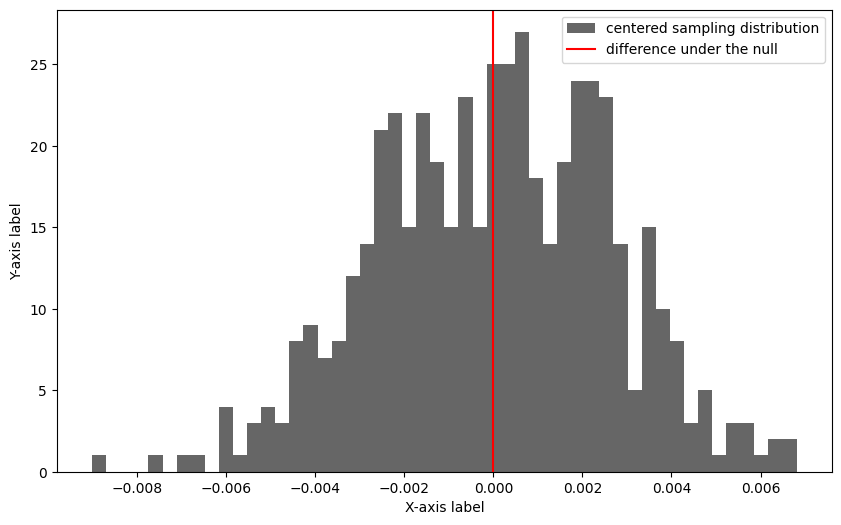

In [83]:
f, ax = plt.subplots(1,1, figsize = (10,6))
ax.hist(p_diffs_centered, bins=50, color='black', alpha=0.6, label="centered sampling distribution")
ax.axvline(0, color='red', label="difference under the null")

# Add labels, legends, and show the plot
ax.set_xlabel("X-axis label")
ax.set_ylabel("Y-axis label")
ax.legend()
plt.show()

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [87]:
#proportion_greater
difference = df.query('group== "treatment"')['converted'].mean() - df.query('group=="control"')['converted'].mean()
print(f'difference in conversion rates: {difference}')
p_value = (p_diffs_centered > difference).mean()

print(f'p-value: {p_value}')

difference in conversion rates: 0.050066728877864425
p-value: 0.0


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

In part (g), I computed the proportion_greater, which represents the proportion of simulated differences in conversion rates 
In scientific studies, this value is often referred to as the p-value. The p-value measures the probability of obtaining results as extreme as, or more extreme than, the observed results under the assumption that the null hypothesis is true. In this case, the null hypothesis typically states that there is no significant difference between the new and old pages in terms of conversion rates.




This value, the p-value, holds significant meaning in terms of determining whether or not there is a difference between the new and old pages while considering our Type I error rate of 0.05.

If the p-value is less than or equal to our Type I error rate (0.05 in this case), it suggests that the observed difference in conversion rates between the new and old pages is statistically significant. In other words, it provides evidence against the null hypothesis, which typically asserts that there is no significant difference between the pages. In this scenario, we would conclude that there is indeed a significant difference between the new and old pages in terms of conversion rates.

On the other hand, if the p-value is greater than 0.05, it indicates that the observed difference is not statistically significant. In such a case, we fail to reject the null hypothesis, suggesting that there is insufficient evidence to conclude that the new pages lead to a different conversion rate compared to the old pages.

conclusion: We reject the null hypotesis we notice that the p-value es less than 0.5 we get the conclusion that treatment is better at the time of convert


<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression is specifically designed for binary classification problems like this one, where the dependent variable (the outcome we are trying to predict) is categorical with two possible outcomes.

In your case, you are likely interested in predicting whether a user converts (1) or does not convert (0) based on various independent variables or factors. Logistic regression models the probability of a binary outcome and is well-suited for analyzing and modeling such scenarios. It can provide insights into the factors that influence the likelihood of conversion, allowing you to understand the relationship between your independent variables and the probability of conversion.

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [16]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,False,False,True
1,US,treatment,1,1,True,True,False
2,UK,treatment,0,1,True,False,True
3,UK,control,0,1,False,False,True
4,UK,treatment,0,1,True,False,True


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [ ]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [12]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.402882
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [ ]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                0.007175
Time:                        16:40:27   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

The p-value In this Regression is equal to 0.000 which means that the null hypothesis can be rejected,The low p-value supports the conclusion that the new page has a statistically significant effect on conversion rates compared to the old page.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [5]:
# Create dummy variables for 'US' and 'UK' and add them to the DataFrame
df[['US', 'UK']] = pd.get_dummies(df['country'])[['US', 'UK']]

# Drop the original 'country' column if needed
# df = df.drop(columns=['country'])

# Ensure that 'intercept' column is included
df['intercept'] = 1

df.head()


,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,False,False,True
1,US,treatment,1,1,True,True,False
2,UK,treatment,0,1,True,False,True
3,UK,control,0,1,False,False,True
4,UK,treatment,0,1,True,False,True


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [10]:
# X = 
# y = 

X = df[['ab_page','UK', 'US']]
y = df['converted']

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [13]:
# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.402882
         Iterations 6


`d)` Provide the summary of your model below.

In [129]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69886
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                -0.04025
Time:                        01:45:49   Log-Likelihood:                -28157.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page        0.0848      0.021      4.096      0.000       0.044       0.125
UK            -1.9878      0.025    -78.936      0.000      -2.037      -1.938
US            -1.9201      0.017   -112.029      0.0

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

 the low p-values for both 'US' and 'UK' suggest that the user's country has a statistically significant impact on the likelihood of conversion. This implies that there are differences in conversion rates among users from these countries.

`conclusion:`


Conclusion for A/B testing, Taking into account the results of the linear regressions, the probabilities and the difference of 533 more people in the treatment group, we have come to the conclusion that a statement about which is better cannot be made with certainty, even so we will be able to realize that in almost all cases the p value reached 0.00, that is, mostly the treatment group was better at converting clients and we can also realize that on average treatment has a conversion rate of 5.25% more than control, we can also deduce that treatment has more visits.
